# 查准率、查全率与F1

有时候我们关心的不仅仅是精度，例如信用卡诈骗识别中，我们可能关心“诈骗交易中有多少被识别出来了”。查准率（Precision）和查全率（Recall）比精度更适合来度量此类问题。


## 查准率、查全率

对于二分类问题，可以将样例根据其真实类别和学习器预测类别划分成真正例（TP，True Positive）、假正例（FP，False Positive）、真反例（TN，True Negative）、假反例（FN，False Negative）四种情形。

<table>
<tbody>
   <tr><td rowspan="2" style="text-align:center">真实情况</td><td colspan="2" style="text-align:center">预测结果</td></tr>
   <tr><td style="text-align:center">正例</td><td style="text-align:center">反例</td></tr>
   <tr><td>正例</td><td>TP（真正例）</td><td>FN（假反例）</td></tr>
   <tr><td>反例</td><td>FP（假正例）</td><td>TN（真反例）</td></tr>
</tbody>
</table>

查准率 $P$ 与查全率 $R$ 分别定义为：

$$ P = \frac{TP}{TP + FP} $$
$$ R = \frac{TP}{TP + FN} $$

通俗的理解查准率与查全率：

- 查准率：判别为正例的结果中真正例的比例
- 查全率：所有正例中，判别结果是真理的比例

查准率与查全率是一对矛盾的度量。一般来说，查准率高时，查全率往往偏低；而查全率高时，查准率往往偏低。例如，若希望将好瓜尽可能多地选出来，则可以通过增加选瓜的数量来实现，如果将所有西瓜都选上，那么所有的好瓜也必然都被选上了，但这样查准率就会较低；若希望选出的瓜中好瓜比例尽可能高，则可只挑选最有把握的瓜，但这样就难免会漏掉不少好瓜，使得查全率较低。通常只有在一些简单任务中，才可能使查全率和查准率都很高。

既然查准率与查全率是矛盾的，那么我们如何以查准率、查全率来衡量一个学习器的性能呢，到底侧重于哪一个指标呢？下面我们介绍针对于查准率、查全率的评价方法。

## 评价方法

### P-R曲线

根据学习器的预测结果对样例进行排序，排在前面的是学习器认为“最可能”是正例的样本，排在最后的则是学习器认为“最不可能”是正例的样本。按此顺序逐个把样本作为正例进行预测，则每次可以计算出当前的查全率、查准率。以查准率为纵轴、查全率为横轴作图，就得到了查准率-查全率曲线，简称“P-R曲线”，显示该曲线的图成为“P-R图”。


P-R图直观地显示出学习器在样本总体上的查全率、查准率。在进行比较时，若一个学习器的P-R曲线被另一个学习器的曲线完全“包住”，则可断言后者的性能优于前者；如果两个学习器的P-R曲线发生了交叉，则难以一般性地断言两者孰优孰劣，只能在具体的查准率或查全率条件下进行比较。

对于两个P-R曲线交叉的情况，一个比较合理的判据是比较**P-R曲线下面积**的大小，它在一定程度上表征了学习器在查准率和查全率上取得相对“双高”的比例。但这个值不太容易估算。

**平衡点**（Break-Even Point，简称BEP）是另一个综合考虑查准率、查全率的度量，它是“查准率=查全率”时的取值。可以认为平衡点取值高的学习器更优。

### F1度量

F1度量的计算方法如下：

$$ F1 = \frac{2 \times P \times R}{P + R} = \frac{2 \times TP}{m + TP - TN} $$

其中 $m$ 是样例总数。

它是基于查准率与查全率的调和平均（harmonic mean）定义的：

$$ \frac{1}{F1} = \frac{1}{2} \cdot \left( \frac{1}{P} + \frac{1}{R} \right) $$

在一些情况下，对查准率、查全率的重视程度会有所不同。例如在商品推荐系统中，为了尽可能少打扰用户，更希望推荐内容确是用户感兴趣的，此时查准率更重要；而在逃犯信息检索系统中，更希望尽可能少漏掉逃犯，此时查全率更重要。F1度量的一般形式—— $F_{\beta}$，能让我们表达出对查准率/查全率的不同偏好，它定义为

$$ F_{\beta} = \frac{\left( 1 + \beta^2 \right) \times P \times R}{\left( \beta^2 \times P \right) + R} $$

其中 $\beta > 0$ 度量了查全率对查准率的相对重要性。$\beta = 1$ 时退化为标准的F1；$\beta > 1$ 时查全率有更大影响；$\beta < 1$ 时查准率有更大影响。

它是查准率与查全率的加权调和平均：

$$ \frac{1}{F_{\beta}} = \frac{1}{1 + \beta^2} \cdot \left( \frac{1}{P} + \frac{\beta^2}{R} \right) $$


> 与算数平均（$\frac{P+R}{2}$）和几何平均（$\sqrt{P \times R}$）相比，调和平均更重视较小值。

## macro-average、micro-average

很多时候我们有多个二分类混淆矩阵，例如进行多次训练、测试，每次得到一个混淆矩阵；或是在多个数据集上进行训练、测试，希望估计算法的“全局”性能；甚或是执行多分类任务，每两两类别的组合都对应一个混淆矩阵；……总之，我们希望在n个二分类混淆矩阵上综合考察查准率和查全率。

一种直接的做法是先在各混淆矩阵上分别计算出查准率和查全率，记为 $\left( P_1, R_1 \right), \left( P_2, R_2 \right), \ldots, \left( P_n, R_n \right) $，再计算平均值，这样就得到了“宏查准率”（macro-P）、“宏查全率”（macro-R），以及相应的“宏F1”（macro-F1）：

$$ \text{macro-}P = \frac{1}{n} \sum_{i=1}^{n} P_i $$
$$ \text{macro-}R = \frac{1}{n} \sum_{i=1}^{n} R_i $$
$$ \text{macro-}F1 = \frac{2 \times \text{macro-}P \times \text{macro-}R}{\text{macro-}P + \text{macro-}R } $$

还可以先将各混淆矩阵的对应元素进行平均，得到TP、FP、TN、FN的平均值，分别记为 $\overline{TP}$、$\overline{FP}$、$\overline{TN}$、$\overline{FN}$，再基于这些平均值计算出“微查准率”（micro-P）、“微查全率”（micro-R）和“微F1”（micro-F1）：

$$ \text{micro-}P = \frac{\overline{TP}}{\overline{TP} + \overline{FP}} $$
$$ \text{micro-}R = \frac{\overline{TP}}{\overline{TP} + \overline{FN}} $$
$$ \text{micro-}F1 = \frac{2 \times \text{micro-}P \times \text{micro-}R}{\text{micro-}P + \text{micro-}R } $$


看个具体的例子。假设学习器对测试集1的测试结果如下：

- True positive (TP1)  = 12
- False positive (FP1) = 9
- False negative (FN1) = 3

precision（P1）和recall（R1）分别为57.14、80。

对测试集2的测试结果如下：

- True positive (TP2)  = 50
- False positive (FP2) = 23
- False negative (FN2) = 9

precision（P2）和recall（R2）分别为68.49、84.75。

macro-P、macro-R分别为：

$$ \text{macro-}P = \frac{P1+P2}{2} = \frac{57.14+68.49}{2} = 62.82 $$
$$ \text{macro-}R = \frac{R1+R2}{2} = \frac{80+84.75}{2} = 82.38 $$

micro-P、micro-R分别为：

$$ \text{micro-}P = \frac{TP1+TP2}{TP1+FP1+TP2+FP2} = \frac{12+50}{12+9+50+23} = 65.96 $$
$$ \text{micro-}R = \frac{TP1+TP2}{TP1+FN1+TP2+FN2} = \frac{12+50}{12+3+50+9} = 83.78 $$

## Demo

demo来源于[sklean官网](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)。

demo中用到了**Average Precision**：

$$ \text{AP} = \sum_{i} \left( R_i - R_{i-1} \right) P_i $$

它是加权平均精度，每个阈值的权重是它的Recall减去上一个阈值的Recall。从几何的角度理解，不难发现AP计算的就是P-R曲线下的面积。

### 二分类问题

In [195]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import average_precision_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

# 增加噪声特征，给每个样本随机增加200个特征
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# 只选取前两类拆分成训练集、测试集
X_train, X_test, y_train, y_test = train_test_split(X[y<2], y [y<2], test_size=.5, random_state=random_state)

# 学习器
classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)
y_socre = classifier.decision_function(X_test)

# 平均精度
average_precision = average_precision_score(y_test, y_socre)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.88


绘制P-R曲线。

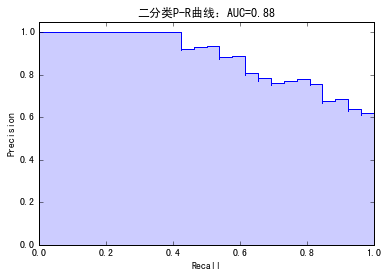

In [196]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
%matplotlib inline

precision, recall, _ = precision_recall_curve(y_test, y_socre)
plt.step(recall, precision, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0, 1.05])
plt.xlim([0, 1.0])
plt.title('二分类P-R曲线：AUC=%0.2f' % average_precision)
plt.show()

### 多分类问题

创建多分类数据、训练、预测

In [197]:
from sklearn.preprocessing import label_binarize

# 多分类标签转为向量（二值化）
Y = label_binarize(y, classes=[0, 1, 2])
n_classes = Y.shape[1] #类别数量

# 划分测试集、训练集
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5, random_state=random_state)

# OneVsRest
from sklearn.multiclass import OneVsRestClassifier
classifier = OneVsRestClassifier(svm.LinearSVC(random_state=random_state))
classifier.fit(X_train, Y_train)
Y_score = classifier.decision_function(X_test)

计算Recall、Precision、AP

In [198]:
precision = dict()
recall = dict()
average_precision = dict()

# 每个类别的Precision和Recall、AP
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_train[:, i], Y_score[:, i])
    average_precision[i] = average_precision_score(Y_train[:, i], Y_score[:, i])
    
# micro-Precision、micro-Recall、micro-AP
precision['micro'], recall['micro'], _ = precision_recall_curve(Y_test.ravel(), Y_score.ravel())
average_precision['micro'] = average_precision_score(Y_test.ravel(), Y_score.ravel(), average="micro")

print('Average precision score, micro-averaged over all classes: %0.2f' % average_precision["micro"])

Average precision score, micro-averaged over all classes: 0.42


绘制micro P-R曲线

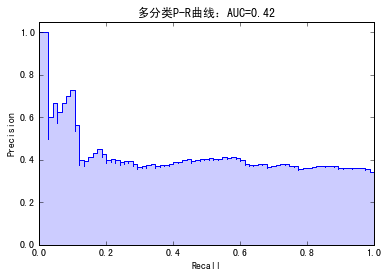

In [199]:
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')
plt.fill_between(recall['micro'], precision['micro'], step='post', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0, 1.0])
plt.ylim([0, 1.05])
plt.title('多分类P-R曲线：AUC=%.2f' % average_precision['micro'])
plt.show()

绘制每个类别、micro的P-R曲线，并绘制f1曲线

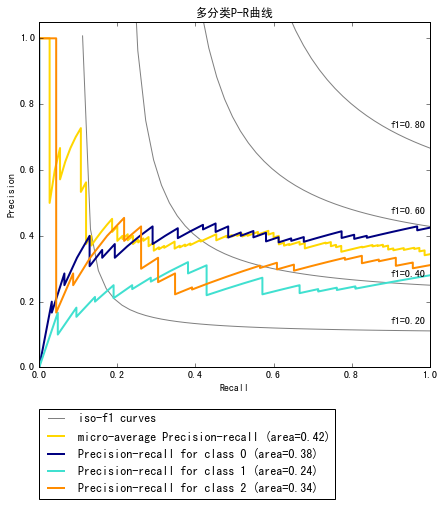

In [200]:
from itertools import cycle

colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
lines = []
labels = []

# 绘制f1分别等于0.2,0.4,0.6,0.8时的Recall、Precision关系
f_scores = np.linspace(0.2, 0.8, num=4)
for f_score in f_scores:
    x = np.linspace(0.01, 1) # Recall的取值
    y = f_score * x / (2 * x - f_score) # 给定了f1和Recall，算出Precision
    l, = plt.plot(x[y>=0], y[y>=0], color='gray') # 绘制该f1取值下的Recall、Precision关系
    plt.annotate('f1=%.2f' % f_score, xy=(0.9, y[45]+0.02))

lines.append(l)
labels.append('iso-f1 curves')

# micro P-R曲线
l, = plt.plot(recall['micro'], precision['micro'], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area=%.2f)' % average_precision['micro'])

# 每个类别的P-R曲线
for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class %s (area=%.2f)' % (i, average_precision[i]))
    
fig = plt.gcf()
fig.subplots_adjust(bottom=0.3)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0, 1.0])
plt.ylim([0, 1.05])
plt.title('多分类P-R曲线')
plt.legend(lines, labels, loc=(0, -.38))
plt.show()